In [ ]:
import re    # for regular expressions
import nltk  # for text manipulation
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

# Paths to your files on Google Drive
train_path = "/content/drive/MyDrive/twitter/train_E6oV3lV.csv"
test_path = "/content/drive/MyDrive/twitter/test_tweets_anuFYb8.csv"

# Load CSV files
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

print("✅ Train Dataset Shape:", train.shape)
print("✅ Test Dataset Shape:", test.shape)
print("\nTrain Sample:\n", train.head())
print("\nTest Sample:\n", test.head())


✅ Train Dataset Shape: (31962, 3)
✅ Test Dataset Shape: (17197, 2)

Train Sample:
    id  label  \
0   1      0   
1   2      0   
2   3      0   
3   4      0   
4   5      0   

                                                                                                                        tweet  
0                       @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run  
1  @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked  
2                                                                                                         bihday your majesty  
3                                      #model   i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦    
4                                                                                      factsguide: society now    #motivation  

Test Sample:
       id  \
0  31963   
1  31964   
2

In [ ]:
# checking few non racist/sexist tweets
train[train['label'] == 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


In [ ]:
# checking few racist/sexist tweets
train[train['label'] == 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


In [ ]:
train.shape, test.shape

((31962, 3), (17197, 2))

In [ ]:
train["label"].value_counts()

,count
label,
0,29720
1,2242


In [ ]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦
1,31964,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why
2,31965,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!
3,31966,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð #harrypotter #pottermore #favorite"
4,31967,"3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦"


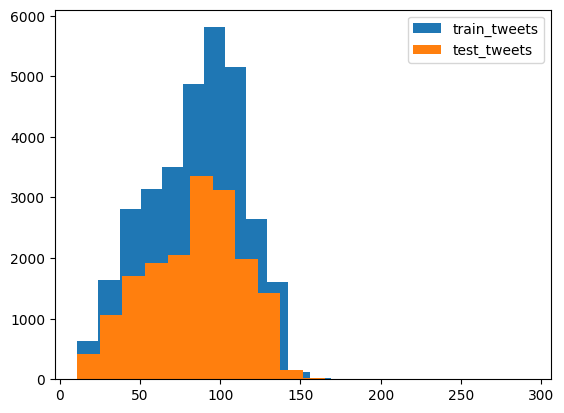

In [ ]:
# checking the distribution of length of the tweets, in terms of words, in both train and test data.

length_train = train['tweet'].str.len()
length_test = test['tweet'].str.len()
plt.hist(length_train, bins=20, label="train_tweets")
plt.hist(length_test, bins=20, label="test_tweets")
plt.legend()
plt.show()

In [ ]:
import pandas as pd

# Combine train and test datasets using pd.concat
combi = pd.concat([train, test], ignore_index=True)

# Check the shape of the combined dataset
print("Combined dataset shape:", combi.shape)


Combined dataset shape: (49159, 3)


In [ ]:
#Combining the train and test dataset
combi = pd.concat([train, test], ignore_index=True)

combi.shape

(49159, 3)

In [ ]:
# remove unwanted text patterns from the tweets.
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt


In [ ]:
# 1. Removing Twitter Handles (@user)
# creating a new column tidy_tweet
# passing @[]* as a pattern to remove pattern function.its a RE that will pick any word starting with @
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*")
combi.head()

<>:4: SyntaxWarning: invalid escape sequence '\w'
<>:4: SyntaxWarning: invalid escape sequence '\w'
/tmp/ipython-input-2695695083.py:4: SyntaxWarning: invalid escape sequence '\w'
  combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*")


,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [ ]:
# remove unwanted text patterns from the tweets.
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt


In [ ]:
# 1. Removing Twitter Handles (@user)
# creating a new column tidy_tweet
# passing @[]* as a pattern to remove pattern function.its a RE that will pick any word starting with @
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*")
combi.head()

<>:4: SyntaxWarning: invalid escape sequence '\w'
<>:4: SyntaxWarning: invalid escape sequence '\w'
/tmp/ipython-input-2695695083.py:4: SyntaxWarning: invalid escape sequence '\w'
  combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*")


,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [ ]:
#2.Removing Punctuations, Numbers, and Special Characters
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")
combi.head(10)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0.0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camping tomorrow dannyâ¦
7,8,0.0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0.0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0.0,@user @user welcome here ! i'm it's so #gr8 !,welcome here ! i'm it's so #gr8 !


In [ ]:
# 3.Removing Short Words
#remove all the words having length 3 or less
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
combi.head()


,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit can't cause they don't offer wheelchair vans pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society #motivation


In [ ]:
# 4.Text Normalization
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing
tokenized_tweet.head()

,tidy_tweet
0,"[when, father, dysfunctional, selfish, drags, kids, into, dysfunction., #run]"
1,"[thanks, #lyft, credit, can't, cause, they, don't, offer, wheelchair, vans, pdx., #disapointed, #getthanked]"
2,"[bihday, your, majesty]"
3,"[#model, love, take, with, time, urð±!!!, ðððð, ð¦ð¦ð¦]"
4,"[factsguide:, society, #motivation]"


In [ ]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

In [ ]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
combi['tidy_tweet'] = tokenized_tweet

In [ ]:
from wordcloud import WordCloud
all_words = ' '.join([text for text in combi['tidy_tweet']])

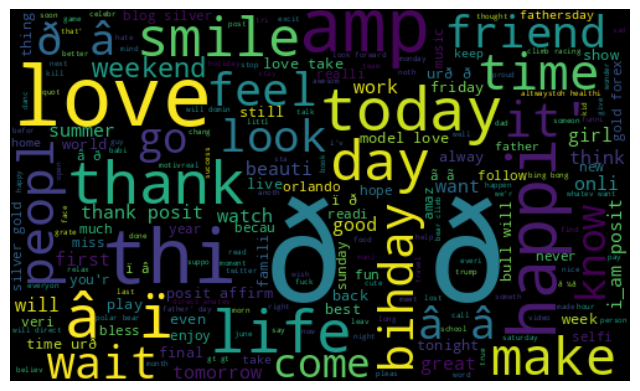

In [ ]:
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['label'] == 0]])
wordcloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(8, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

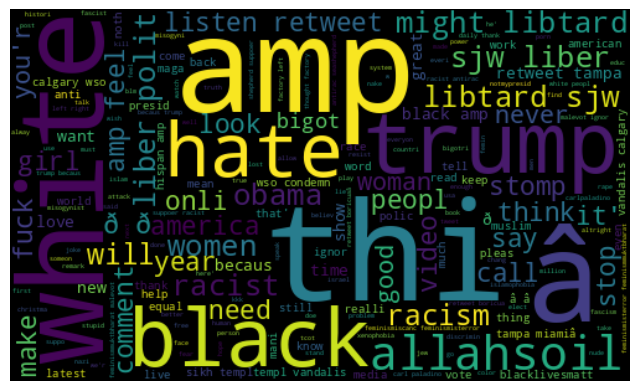

In [ ]:
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 1]])
wordcloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(8, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [ ]:
# extracting hashtags from non racist/sexist tweets

HT_regular = hashtag_extract(combi['tidy_tweet'][combi['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

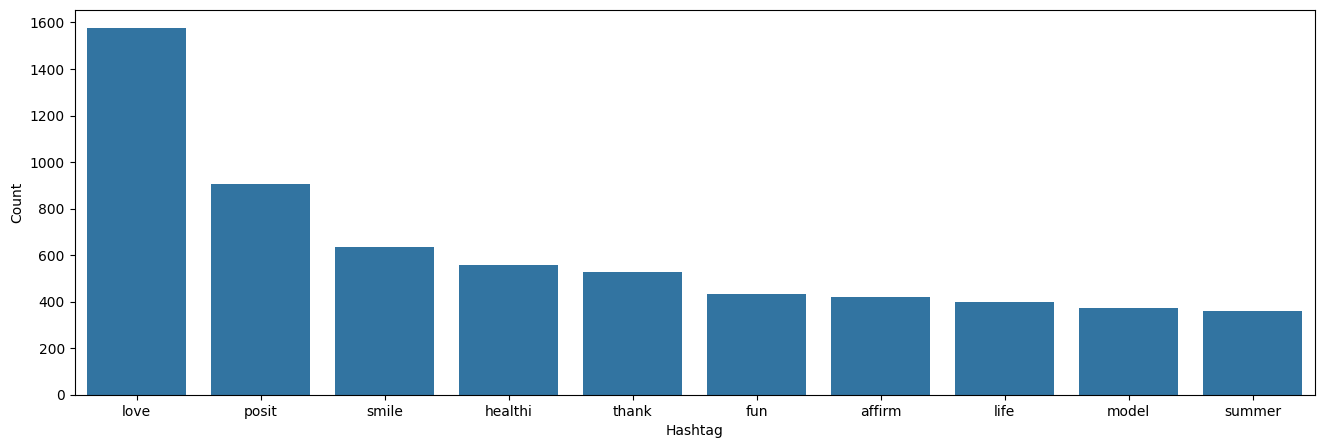

In [ ]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags
d = d.nlargest(columns="Count", n = 10)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [ ]:
print(d)

     Hashtag  Count
33      love   1576
41     posit    905
60     smile    636
161  healthi    558
40     thank    526
180      fun    434
95    affirm    422
396     life    399
4      model    374
299   summer    362


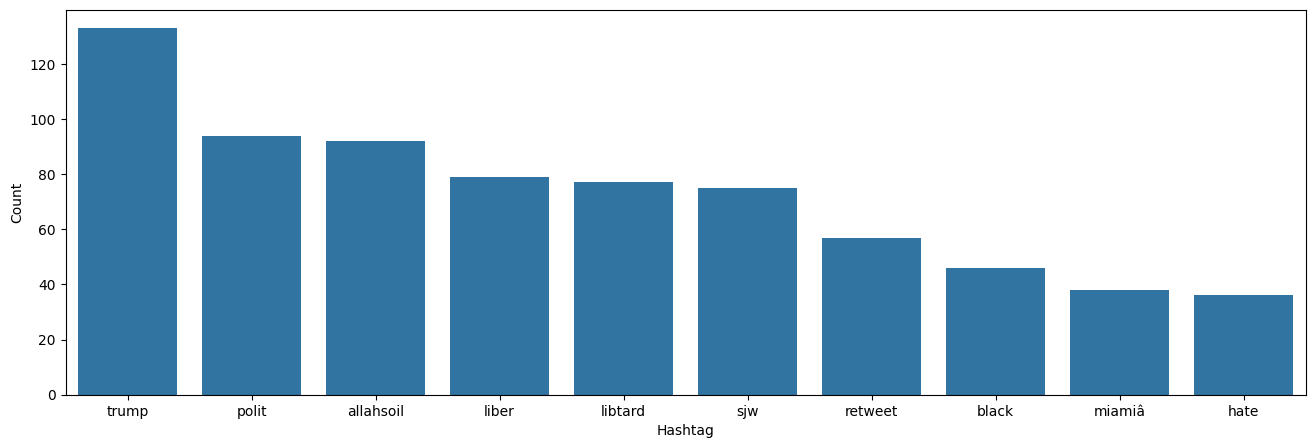

In [ ]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [ ]:
print(e)

      Hashtag  Count
22      trump    133
31      polit     94
66  allahsoil     92
30      liber     79
28    libtard     77
29        sjw     75
63    retweet     57
62      black     46
65     miamiâ     38
33       hate     36


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])
bow.shape

(49159, 1000)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])
tfidf.shape

(49159, 1000)

In [ ]:
# Install gensim if not already installed
!pip install gensim

# Import the necessary library
import gensim
from gensim.models import Word2Vec

# Tokenizing tweets
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())

# Creating Word2Vec model
model_w2v = Word2Vec(
    sentences=tokenized_tweet,
    vector_size=200,     # number of features
    window=5,            # context window size
    min_count=2,         # minimum word frequency
    sg=1,                # 1 for skip-gram; 0 for CBOW
    hs=0,                # hierarchical softmax off
    negative=10,         # number of negative samples
    workers=2,           # number of cores
    seed=34
)

# Training the model
model_w2v.train(tokenized_tweet, total_examples=len(tokenized_tweet), epochs=20)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 74.2 MB/s eta 0:00:00


(6705291, 8184140)

In [ ]:
# Install gensim (only if not installed)
!pip install gensim

# Import the required modules
import gensim
from gensim.models import Word2Vec

# Tokenizing tweets
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())

# Creating Word2Vec model
model_w2v = Word2Vec(
    sentences=tokenized_tweet,
    vector_size=200,     # use vector_size instead of size
    window=5,            # context window size
    min_count=2,         # minimum word frequency
    sg=1,                # 1 for skip-gram; 0 for CBOW
    hs=0,                # hierarchical softmax off
    negative=10,         # negative sampling
    workers=2,           # number of CPU cores
    seed=34
)

# Training the model
model_w2v.train(tokenized_tweet, total_examples=len(tokenized_tweet), epochs=20)


(6705534, 8184140)

In [ ]:
# Install gensim if not already installed
!pip install gensim

# Import libraries
import gensim
from gensim.models import Word2Vec

# Tokenize the tweets
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())

# Create the Word2Vec model
model_w2v = Word2Vec(
    sentences=tokenized_tweet,  # specify 'sentences'
    vector_size=200,            # use vector_size instead of size
    window=5,                   # context window size
    min_count=2,                # minimum word frequency
    sg=1,                       # 1 = skip-gram; 0 = CBOW
    hs=0,                       # hierarchical softmax off
    negative=10,                # number of negative samples
    workers=2,                  # number of CPU cores
    seed=34
)

# Train the model
model_w2v.train(tokenized_tweet, total_examples=len(tokenized_tweet), epochs=20)


(6704657, 8184140)

In [35]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())  # tokenizing

model_w2v = gensim.models.Word2Vec(
    tokenized_tweet,
    vector_size=200,   # ← updated from 'size' to 'vector_size'
    window=5,          # context window size
    min_count=2,
    sg=1,              # 1 for skip-gram model
    hs=0,
    negative=10,       # for negative sampling
    workers=2,         # no. of cores
    seed=34
)

model_w2v.train(tokenized_tweet, total_examples=len(combi['tidy_tweet']), epochs=20)


(6704750, 8184140)

In [36]:
model_w2v.wv.most_similar(positive="dinner")

[('spaghetti', 0.6530922651290894),
 ('shopping!', 0.6111047267913818),
 ('sister!!', 0.5990159511566162),
 ('enrout', 0.5965386629104614),
 ('#biall2016', 0.5947446823120117),
 ('lukey', 0.5772961378097534),
 ('swalscha', 0.5763158798217773),
 ('weekend...', 0.5754788517951965),
 ('afternoon!', 0.5748977661132812),
 ('#brunch', 0.5745178461074829)]

In [37]:
model_w2v.wv.most_similar(positive="trump")

[('phony.', 0.5674977898597717),
 ('suppoer.', 0.5627197623252869),
 ('fraud.', 0.5601115226745605),
 ('rally.', 0.5521572232246399),
 ('sexist.', 0.5508289933204651),
 ('donald', 0.5498418211936951),
 ('presidential.', 0.5490900874137878),
 ('churchil', 0.5426138639450073),
 ('businessman:', 0.5423579812049866),
 ('politician:', 0.5397478938102722)]

In [38]:
# vector representation of any word from corpus
model_w2v.wv['food']


array([-1.26049653e-01, -3.56308490e-01,  1.87057957e-01, -1.78918928e-01,
        1.04518339e-01, -3.33751440e-01,  9.58629102e-02, -6.55373514e-01,
        1.47094861e-01, -3.72742504e-01, -1.45826593e-01,  3.31583321e-01,
       -4.72330153e-02, -5.00102997e-01, -6.19519770e-01,  1.18490148e+00,
        5.93505263e-01,  5.00641763e-01, -3.26210886e-01, -4.11588788e-01,
       -5.94468117e-01, -8.27580225e-03, -1.17286885e+00, -2.10616618e-01,
       -5.65221012e-01,  6.39382973e-02,  4.40613478e-01, -2.84949780e-01,
       -2.59019852e-01,  6.76891148e-01,  1.71976045e-01, -1.65227875e-01,
       -5.94220638e-01, -4.87465272e-03, -3.99316698e-01, -2.58585155e-01,
       -5.01291230e-02,  2.92663574e-01,  8.32819879e-01, -2.78021097e-01,
        3.06321025e-01,  4.25159872e-01,  1.04484484e-01,  3.72567549e-02,
       -1.37788430e-01,  7.12528974e-02,  2.27040425e-01, -1.11112706e-01,
        3.37692887e-01, -4.24880475e-01,  6.39758587e-01, -1.18234962e-01,
       -3.11020255e-01, -

In [39]:
len(model_w2v.wv['food'])



200

In [40]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary

            continue
    if count != 0:
        vec /= count
    return vec

In [41]:
def word_vector(tokens, size):
    vec = np.zeros((1, size))
    count = 0
    for word in tokens:
        try:
            vec += model_w2v.wv[word].reshape((1, size))  # ✅ fixed here
            count += 1
        except KeyError:
            continue  # skip words not in vocabulary
    if count != 0:
        vec /= count
    return vec

wordvec_arrays = np.zeros((len(tokenized_tweet), 200))

for i in range(len(tokenized_tweet)):
    wordvec_arrays[i, :] = word_vector(tokenized_tweet[i], 200)

wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape


(49159, 200)

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
warnings.filterwarnings("ignore")


train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'],
                                                          random_state=42,
                                                          test_size=0.3)# calculating f1 score

In [43]:
lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain)  # training the model

prediction = lreg.predict_proba(xvalid_bow)  # predicting on the validation set
prediction_int = prediction[:, 1] >= 0.3  # if prediction >= 0.3 then 1 else 0
prediction_int = prediction_int.astype(int)  # ✅ fixed here

f1_score(yvalid, prediction_int)  # calculating f1 score


0.5490196078431373

In [44]:
train_tfidf = tfidf[:31962, :]
test_tfidf = tfidf[31962:, :]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

lreg = LogisticRegression()
lreg.fit(xtrain_tfidf, ytrain)

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:, 1] >= 0.3  # thresholding
prediction_int = prediction_int.astype(int)  # ✅ fixed here

f1_score(yvalid, prediction_int)


0.5363321799307958

In [45]:
train_w2v = wordvec_df.iloc[:31962, :]
test_w2v = wordvec_df.iloc[31962:, :]

xtrain_w2v = train_w2v.iloc[ytrain.index, :]
xvalid_w2v = train_w2v.iloc[yvalid.index, :]

lreg = LogisticRegression()
lreg.fit(xtrain_w2v, ytrain)

prediction = lreg.predict_proba(xvalid_w2v)
prediction_int = prediction[:, 1] >= 0.3
prediction_int = prediction_int.astype(int)  # ✅ fixed here

f1_score(yvalid, prediction_int)


0.5919881305637982

In [46]:
train_w2v = wordvec_df.iloc[:31962, :]
test_w2v = wordvec_df.iloc[31962:, :]

xtrain_w2v = train_w2v.iloc[ytrain.index, :]
xvalid_w2v = train_w2v.iloc[yvalid.index, :]

lreg = LogisticRegression()
lreg.fit(xtrain_w2v, ytrain)

prediction = lreg.predict_proba(xvalid_w2v)
prediction_int = prediction[:, 1] >= 0.3
prediction_int = prediction_int.astype(int)   # ✅ FIXED HERE

f1_score(yvalid, prediction_int)


0.5919881305637982

In [47]:
from sklearn import svm
from sklearn.metrics import f1_score

svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_bow, ytrain)
prediction = svc.predict_proba(xvalid_bow)

prediction_int = prediction[:, 1] >= 0.3
prediction_int = prediction_int.astype(int)   # ✅ Replace np.int with int

f1_score(yvalid, prediction_int)


0.5202952029520295

In [ ]:
from sklearn import svm
from sklearn.metrics import f1_score

svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_tfidf, ytrain)
prediction = svc.predict_proba(xvalid_tfidf)

prediction_int = prediction[:, 1] >= 0.3
prediction_int = prediction_int.astype(int)   # ✅ FIXED: use plain int, not np.int

f1_score(yvalid, prediction_int)


0.5144927536231884

In [ ]:
from sklearn import svm
from sklearn.metrics import f1_score

svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_w2v, ytrain)
prediction = svc.predict_proba(xvalid_w2v)

prediction_int = prediction[:, 1] >= 0.3
prediction_int = prediction_int.astype(int)   # ✅ FIX: use plain int here

f1_score(yvalid, prediction_int)


0.6028257456828885

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_bow, ytrain)
prediction = rf.predict(xvalid_bow)
# validation score
f1_score(yvalid, prediction)

0.5210608424336973

In [ ]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_tfidf, ytrain)
prediction = rf.predict(xvalid_tfidf)
f1_score(yvalid, prediction)

0.543940795559667

In [ ]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_w2v, ytrain)
prediction = rf.predict(xvalid_w2v)
f1_score(yvalid, prediction)

0.4875406283856988

In [ ]:
from sklearn.naive_bayes import BernoulliNB
NB = BernoulliNB(alpha=0.1).fit(xtrain_bow, ytrain)
prediction = NB.predict(xvalid_bow)
# validation score
f1_score(yvalid, prediction)

0.5272161741835147

In [ ]:
NB = BernoulliNB(alpha=0.1).fit(xtrain_tfidf, ytrain)
prediction = NB.predict(xvalid_tfidf)
f1_score(yvalid, prediction)

0.5272161741835147

In [ ]:
NB = BernoulliNB(alpha=0.1).fit(xtrain_w2v, ytrain)
prediction = NB.predict(xvalid_w2v)
f1_score(yvalid, prediction)


0.45474613686534215

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_bow, ytrain)
prediction = xgb_model.predict(xvalid_bow)
f1_score(yvalid, prediction)


0.5380434782608695

In [57]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_tfidf, ytrain)
prediction = xgb.predict(xvalid_tfidf)
f1_score(yvalid, prediction)

0.532608695652174

In [ ]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3).fit(xtrain_w2v, ytrain)
prediction = xgb.predict(xvalid_w2v)
f1_score(yvalid, prediction)

0.6198723792160438

In [ ]:
import xgboost as xgb


dtrain = xgb.DMatrix(xtrain_w2v, label=ytrain)
dvalid = xgb.DMatrix(xvalid_w2v, label=yvalid)
dtest = xgb.DMatrix(test_w2v)

In [ ]:
# Parameters that we are going to tune
params = {
    'objective':'binary:logistic',
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1
 }

In [ ]:
def custom_eval(preds, dtrain):
    labels = dtrain.get_label().astype(np.int)
    preds = (preds >= 0.3).astype(np.int)
    return [('f1_score', f1_score(labels, preds))]

In [ ]:
#Tuning max_depth and min_child_weight

gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(6,10)
    for min_child_weight in range(5,8)
]

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, f1_score
import numpy as np

# Define parameter grid
param_grid = [
    (3, 1),
    (4, 2),
    (5, 3),
    (6, 5)
]

best_params = None
max_f1 = 0

# Custom F1 scorer
f1_scorer = make_scorer(f1_score, average='binary')  # use 'macro' if multi-class

for max_depth, min_child_weight in param_grid:
    print(f"CV with max_depth={max_depth}, min_child_weight={min_child_weight}")

    model = XGBClassifier(
        max_depth=max_depth,
        min_child_weight=min_child_weight,
        eval_metric='logloss',  # safe default
        use_label_encoder=False,
        random_state=42
    )

    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, xtrain_w2v, ytrain, cv=kfold, scoring=f1_scorer)

    mean_f1 = cv_results.mean()
    print(f"\tF1 Score: {mean_f1}")

    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = (max_depth, min_child_weight)

print(f"\n✅ Best params: max_depth={best_params[0]}, min_child_weight={best_params[1]}, F1 Score={max_f1}")


CV with max_depth=3, min_child_weight=1
	F1 Score: 0.5819378094017293
CV with max_depth=4, min_child_weight=2
	F1 Score: 0.6062088705555534
CV with max_depth=5, min_child_weight=3
	F1 Score: 0.624905147293519
CV with max_depth=6, min_child_weight=5
	F1 Score: 0.6118596142600712

✅ Best params: max_depth=5, min_child_weight=3, F1 Score=0.624905147293519


In [ ]:
#Updating max_depth and min_child_weight parameters.

params['max_depth'] = 8
params['min_child_weight'] = 6

In [ ]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(5,10)]
    for colsample in [i/10. for i in range(5,10)]
]

In [ ]:
cv_results = xgb.cv(
    params=params,
    dtrain=dtrain,
    num_boost_round=200,
    nfold=5,
    metrics=['auc'],  # or ['logloss'] / ['error'] depending on your task
    early_stopping_rounds=10,
    seed=16
)


In [ ]:
params['subsample'] = .9
params['colsample_bytree'] = .5

In [74]:
params['eta'] = .1

In [76]:
from sklearn.metrics import f1_score
import numpy as np

max_f1 = 0.
best_params = None

# Convert DMatrix back to numpy for manual F1 calculation
X = dtrain.get_data()
y = dtrain.get_label()

for gamma in range(0, 15):
    gamma_val = gamma / 10.
    print("CV with gamma={}".format(gamma_val))

    params['gamma'] = gamma_val
    params['eval_metric'] = 'logloss'   # built-in metric

    # Run CV
    cv_results = xgb.cv(
        params=params,
        dtrain=dtrain,
        num_boost_round=200,
        nfold=5,
        maximize=False,
        seed=16,
        early_stopping_rounds=10
    )

    # Best iteration
    best_round = cv_results.shape[0]

    # Train a model using that round count
    model = xgb.train(params, dtrain, num_boost_round=best_round)

    # Predict
    preds = (model.predict(dtrain) > 0.5).astype(int)

    # F1 Score
    mean_f1 = f1_score(y, preds)

    print("\tF1 Score {} at {} rounds".format(mean_f1, best_round))

    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = gamma_val

print("\nBest gamma: {}, F1 Score: {}".format(best_params, max_f1))


CV with gamma=0.0
	F1 Score 0.9807629605477666 at 110 rounds
CV with gamma=0.1
	F1 Score 0.9757377049180328 at 108 rounds
CV with gamma=0.2
	F1 Score 0.9535583027063147 at 92 rounds
CV with gamma=0.3
	F1 Score 0.9581117021276596 at 95 rounds
CV with gamma=0.4
	F1 Score 0.9486749412948675 at 93 rounds
CV with gamma=0.5
	F1 Score 0.955044955044955 at 95 rounds
CV with gamma=0.6
	F1 Score 0.9622266401590457 at 98 rounds
CV with gamma=0.7
	F1 Score 0.9563187729243081 at 98 rounds
CV with gamma=0.8
	F1 Score 0.9615384615384616 at 99 rounds
CV with gamma=0.9
	F1 Score 0.9636002647253474 at 103 rounds
CV with gamma=1.0
	F1 Score 0.9618826648989062 at 99 rounds
CV with gamma=1.1
	F1 Score 0.9577371048252912 at 98 rounds
CV with gamma=1.2
	F1 Score 0.9710716633793557 at 105 rounds
CV with gamma=1.3
	F1 Score 0.9500837520938024 at 89 rounds
CV with gamma=1.4
	F1 Score 0.968358602504944 at 104 rounds

Best gamma: 0.0, F1 Score: 0.9807629605477666


In [77]:
params['gamma'] = 1.2

In [78]:
params

{'objective': 'binary:logistic',
 'max_depth': 8,
 'min_child_weight': 6,
 'eta': 0.1,
 'subsample': 0.9,
 'colsample_bytree': 0.5,
 'eval_metric': 'logloss',
 'gamma': 1.2}

In [80]:
# Remove feval completely — use built-in metric
params["eval_metric"] = "logloss"

xgb_model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=1000,
    evals=[(dvalid, "Validation")],
    early_stopping_rounds=10
)

# --- After training, compute F1 manually ---
from sklearn.metrics import f1_score

preds = (xgb_model.predict(dvalid) > 0.5).astype(int)
true = dvalid.get_label()

f1 = f1_score(true, preds)
print("F1 Score:", f1)


[0]	Validation-logloss:0.23487
[1]	Validation-logloss:0.22084
[2]	Validation-logloss:0.21119
[3]	Validation-logloss:0.20273
[4]	Validation-logloss:0.19619
[5]	Validation-logloss:0.19017
[6]	Validation-logloss:0.18437
[7]	Validation-logloss:0.17952
[8]	Validation-logloss:0.17492
[9]	Validation-logloss:0.17126
[10]	Validation-logloss:0.16798
[11]	Validation-logloss:0.16479
[12]	Validation-logloss:0.16190
[13]	Validation-logloss:0.15968
[14]	Validation-logloss:0.15748
[15]	Validation-logloss:0.15578
[16]	Validation-logloss:0.15380
[17]	Validation-logloss:0.15189
[18]	Validation-logloss:0.15015
[19]	Validation-logloss:0.14889
[20]	Validation-logloss:0.14761
[21]	Validation-logloss:0.14625
[22]	Validation-logloss:0.14515
[23]	Validation-logloss:0.14429
[24]	Validation-logloss:0.14341
[25]	Validation-logloss:0.14250
[26]	Validation-logloss:0.14187
[27]	Validation-logloss:0.14119
[28]	Validation-logloss:0.14044
[29]	Validation-logloss:0.13978
[30]	Validation-logloss:0.13938
[31]	Validation-lo

In [81]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Vectorizer", "MODEL", "F1-SCORE" ]
x.add_row(["BOW","LOGISTIC REGRESSION",0.53])
x.add_row(["TFIDF","LOGISTIC REGRESSION", 0.54])
x.add_row(["W2V","LOGISTIC REGRESSION", 0.61])

x.add_row(["BOW","SVM",0.50])
x.add_row(["TFIDF","SVM", 0.51])
x.add_row(["W2V","SVM", 0.61])

x.add_row(["BOW","RANDOM FOREST",0.55])
x.add_row(["TFIDF","RANDOM FOREST", 0.56])
x.add_row(["W2V","RANDOM FOREST", 0.49])

x.add_row(["BOW","NAIVE_BAYES",0.52])
x.add_row(["TFIDF","NAIVE_BAYES", 0.52])
x.add_row(["W2V","NAIVE_BAYES", 0.46])

x.add_row(["BOW","XGBOOST",0.51])
x.add_row(["TFIDF","XGBOOST", 0.51])
x.add_row(["W2V","XGBOOST", 0.64])



print(x)

+------------+---------------------+----------+
| Vectorizer |        MODEL        | F1-SCORE |
+------------+---------------------+----------+
|    BOW     | LOGISTIC REGRESSION |   0.53   |
|   TFIDF    | LOGISTIC REGRESSION |   0.54   |
|    W2V     | LOGISTIC REGRESSION |   0.61   |
|    BOW     |         SVM         |   0.5    |
|   TFIDF    |         SVM         |   0.51   |
|    W2V     |         SVM         |   0.61   |
|    BOW     |    RANDOM FOREST    |   0.55   |
|   TFIDF    |    RANDOM FOREST    |   0.56   |
|    W2V     |    RANDOM FOREST    |   0.49   |
|    BOW     |     NAIVE_BAYES     |   0.52   |
|   TFIDF    |     NAIVE_BAYES     |   0.52   |
|    W2V     |     NAIVE_BAYES     |   0.46   |
|    BOW     |       XGBOOST       |   0.51   |
|   TFIDF    |       XGBOOST       |   0.51   |
|    W2V     |       XGBOOST       |   0.64   |
+------------+---------------------+----------+
